# 한글설치

In [1]:
### 한글 설치 -> 실행 후 런타임 다시 시작 -> 아래 셀부터 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,709 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Projects/0. git_commit/Prediction_IndustriesSales")

# 라이브러리

In [3]:
### 라이브러리 임포트
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [5]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import log

import warnings
warnings.filterwarnings("ignore")

# ✅ 신촌동_한식음식점

In [74]:
# 인덱스는 date 컬럼으로, 인덱스 타입은 datetimeIndex로 변경한 채로 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/데이터/0802_신촌_한식음식점.csv', encoding='cp949', index_col='date', parse_dates=True)
print(df.shape)
df.head(3)

(24, 13)


,기준_년_코드,기준_분기_코드,총_점포수,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액
date,,,,,,,,,,,,,
2017-01-01,2017,1,540,470,11,20,70,34974328196,34974328196,24827752559,10146575637,16800873792,13184344000
2017-04-01,2017,2,535,469,16,21,66,35821251882,35821251882,25052051032,10769200850,16724180268,13984075273
2017-07-01,2017,3,529,465,14,20,64,34372357455,34372357455,23824413320,10547944135,15982890369,13292445563


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2017-01-01 to 2022-10-01
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   기준_년_코드     24 non-null     int64
 1   기준_분기_코드    24 non-null     int64
 2   총_점포수       24 non-null     int64
 3   점포_수        24 non-null     int64
 4   개업_점포_수     24 non-null     int64
 5   폐업_점포_수     24 non-null     int64
 6   프랜차이즈_점포_수  24 non-null     int64
 7   총_매출_금액     24 non-null     int64
 8   분기당_매출_금액   24 non-null     int64
 9   주중_매출_금액    24 non-null     int64
 10  주말_매출_금액    24 non-null     int64
 11  남성_매출_금액    24 non-null     int64
 12  여성_매출_금액    24 non-null     int64
dtypes: int64(13)
memory usage: 2.6 KB


## train/test 분리

In [76]:
# Statsmodel을 사용하여 시계열 분석을 하기 위해 freq 설정
df.index.freq='QS'

In [77]:
# train, test 데이터셋 분할
df_train = df.iloc[:20, :]
df_test = df.iloc[20:, :]

# 인덱스, freq 재설정
df_train.index = pd.date_range(start = df_train.index[0], periods=len(df_train), freq='QS')
df_test.index = pd.date_range(start=df_test.index[0], periods=len(df_test), freq='QS')

# 훈련, 테스트셋 모양 확인
df_train.shape, df_test.shape

((20, 13), (4, 13))

In [78]:
# 결과확인
df_test['총_매출_금액']

2022-01-01    18111018888
2022-04-01    25275820262
2022-07-01    25138614612
2022-10-01    29617724330
Freq: QS-JAN, Name: 총_매출_금액, dtype: int64

Text(0.5, 1.0, 'train 실제 데이터')

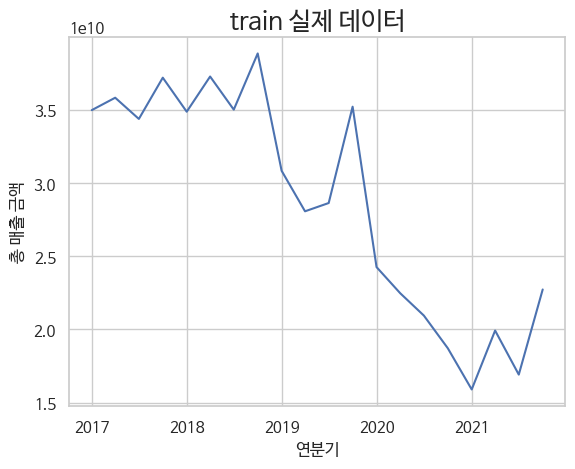

In [79]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


fig, ax = plt.subplots()
ax.plot(df_train.index, df_train['총_매출_금액'])
ax.set_ylabel('총 매출 금액')
ax.set_xlabel('연분기')
ax.set_title('train 실제 데이터', size=18)

> 20년 -> 21년 매출 급락

# Seasonal ARIMA

## stationary 확인

In [80]:
df_train = pd.Series(df_train['총_매출_금액']).astype('float64')

In [81]:
# 정상성 확인
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.dropna())
print('ADF 통계량: %f' % result[0])
print('p-value: %f' % result[1])

ADF 통계량: -0.991975
p-value: 0.756180


> p-value 값이 유의수준 미만(-> 정상성 없음)이 아니라서 차분 진행

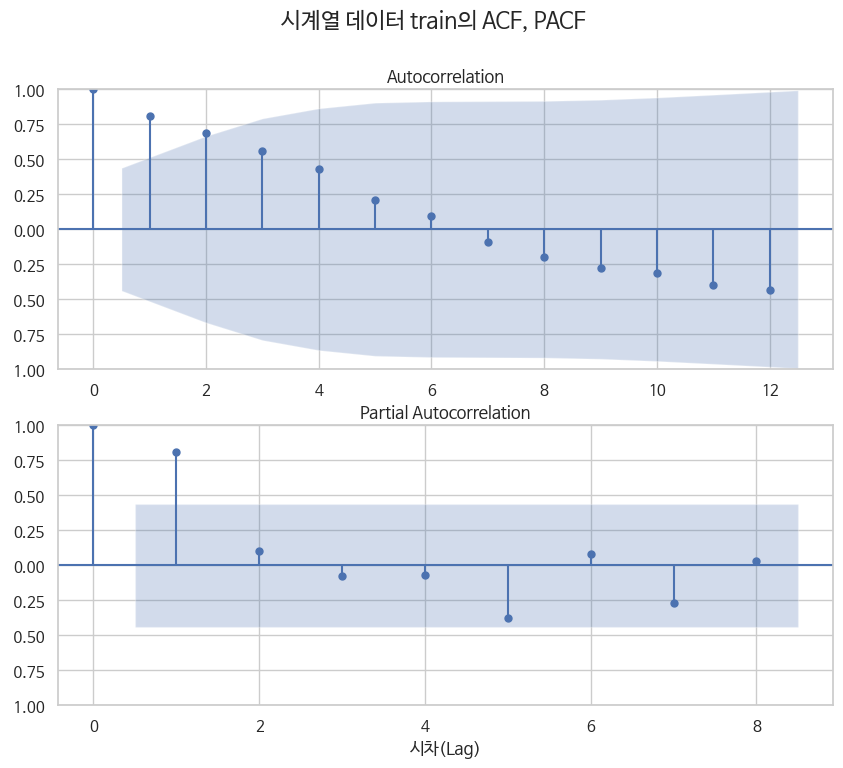

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

'''
- ACF(자기상관) 그래프 --> 시계열 데이터의 계절성을 확인, 현재값과 이전 값과의 상관 관계
- PACF(부분자기상관) 그래프 --> 시계열 데이터에서 과거의 특정 시점들이 현재 값에 영향을 미치는지 확인
'''
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(df_train,  lags=12, ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(df_train, lags=8,  ax=ax2)

plt.xlabel('시차(Lag)')
plt.suptitle('시계열 데이터 train의 ACF, PACF', fontsize=16)
plt.show()

> **AR 모델 적합 : ACF 점차 감소 + PACF 특정 시차 후 급감하기 때문**
- PACF 그래프를 근거로 차수 (p)의 값은 2 또는 3  
- ACF 그래프를 근거로 차수 (q)의 값은 6 또는 7

## 차분

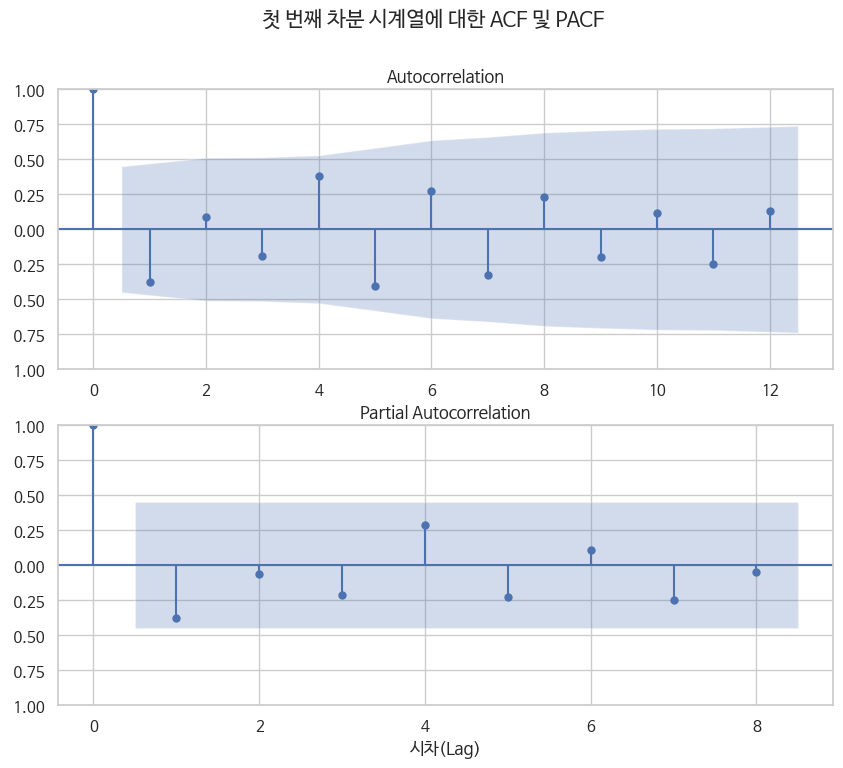

In [83]:
# 차분 진행 함수 정의
def diff(arr, N):
    return np.array([arr[i] - arr[i-N] for i in range(N, len(arr))])

# 1차 차분
diff_1 = diff(df_train, 1)

fig = plt.figure(figsize=(10,8))
# 서브플롯 생성 -> 2행 1열의 1열에 위치
ax1 = fig.add_subplot(211)
fig=plot_acf(diff_1, lags=12,  ax=ax1)

# 서브플롯 생성 -> 2행 1열의 2열에 위치
ax2 = fig.add_subplot(212)
fig=plot_pacf(diff_1, lags=8,  ax=ax2)

plt.xlabel('시차(Lag)')
plt.suptitle('첫 번째 차분 시계열에 대한 ACF 및 PACF', fontsize=15)
plt.show()

In [90]:
# 1차 차분의 ADF 검정
result = adfuller(diff_1)
print(result[0])
print('1차 차분 후 p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# p-value 해석
if result[1] < 0.05:
    print("결과는 데이터가 정상성을 가짐을 나타냅니다. (단위근 없음)")
else:
    print("결과는 데이터가 정상성을 가지지 않음을 나타냅니다. (단위근 존재)")

-5.904451764109984
1차 차분 후 p-value: 0.000000
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661
결과는 데이터가 정상성을 가짐을 나타냅니다. (단위근 없음)


> 따라서 p=0, d=1, q=1

In [98]:
# 모델 생성
model_sarima = sm.tsa.statespace.SARIMAX(endog = df_train,
                                         order=(0, 1, 1), seasonal_order=(0,1,0,4),
                                         trend = 't', freq = 'QS',
                                         seasonal_periods =4,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
# 학습
sarima_fitted = model_sarima.fit(dynamic=False)
print(sarima_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            총_매출_금액   No. Observations:                   20
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 4)   Log Likelihood                -309.449
Date:                            Wed, 06 Mar 2024   AIC                            624.899
Time:                                    13:31:08   BIC                            626.593
Sample:                                01-01-2017   HQIC                           624.550
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       1.867e+08   4.31e-10   4.33e+17      0.000    1.87e+08    1.87e+08
ma.L1          0.1362      0.249   

## 모델 적합도 확인 - 잔차

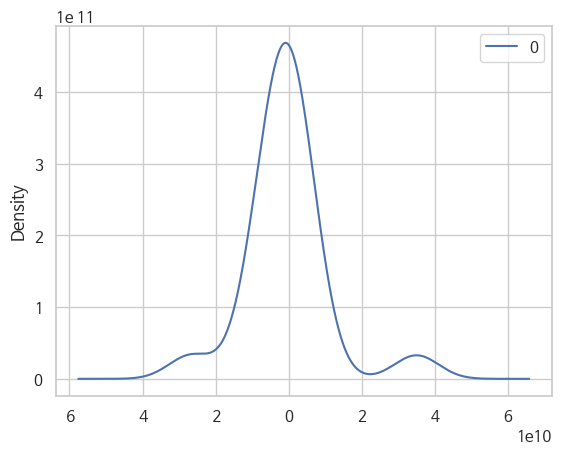

In [99]:
# 잔차의 분포 확인
residual.plot(kind='kde')
plt.show()

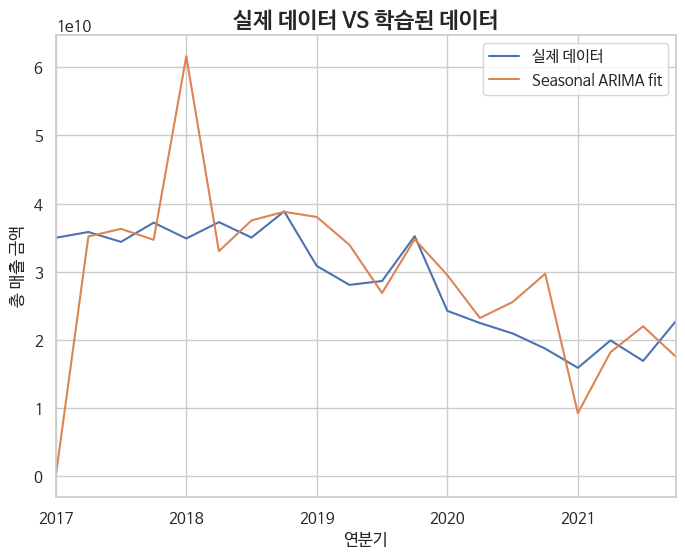

In [100]:
# 실제 데이터와 학습된 데이터 값 비교
df_train.plot(label='실제 데이터',figsize=(8,6))
sarima_fitted.fittedvalues.plot(label='Seasonal ARIMA fit')
plt.ylabel("총 매출 금액");
plt.xlabel("연분기")
plt.title('실제 데이터 VS 학습된 데이터', fontsize= 16, fontweight='bold')
plt.legend();

In [101]:
predicted_sarima = sarima_fitted.predict().values
expected_sarima = df_train.values

mse_sarima  = mean_squared_error(expected_sarima, predicted_sarima)
rmse_sarima = sqrt(mse_sarima)


print('SARIMA 성능평가 :')
print(' ')
print('- RMSE : %f' % rmse_sarima)

SARIMA 성능평가 :
 
- RMSE : 10797237931.470982


# Seasonal ARIMA 모델 검증

In [102]:
# Seasonal ARIMA Model for Validation
df_data = pd.Series(df['총_매출_금액']).astype('float64')

sarima_validation = sm.tsa.statespace.SARIMAX(endog = df_data,
                                                 order=(0, 1, 1), seasonal_order=(0,1,0,4),
                                                 trend = 't', freq = 'QS',
                                                 seasonal_periods =4,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)

sarima_validation = sarima_validation.fit(dynamic=False)
sarima_validation.predict()[20:]

date
2022-01-01    2.219161e+10
2022-04-01    2.529329e+10
2022-07-01    2.523516e+10
2022-10-01    3.405994e+10
Freq: QS-JAN, Name: predicted_mean, dtype: float64

# SARIMA

In [103]:
result = pd.DataFrame({'실제 데이터': df_test['총_매출_금액'],
                                 'predicted_SARIMA': sarima_validation.predict()[20:].values },
                               index = df_test.index)
result

,실제 데이터,predicted_SARIMA
2022-01-01,18111018888,2.219161e+10
2022-04-01,25275820262,2.529329e+10
2022-07-01,25138614612,2.523516e+10
2022-10-01,29617724330,3.405994e+10


In [104]:
df_train

2017-01-01    3.497433e+10
2017-04-01    3.582125e+10
2017-07-01    3.437236e+10
2017-10-01    3.719008e+10
2018-01-01    3.486648e+10
2018-04-01    3.726813e+10
2018-07-01    3.500703e+10
2018-10-01    3.884403e+10
2019-01-01    3.083238e+10
2019-04-01    2.806542e+10
2019-07-01    2.863045e+10
2019-10-01    3.520895e+10
2020-01-01    2.425637e+10
2020-04-01    2.247180e+10
2020-07-01    2.094498e+10
2020-10-01    1.871640e+10
2021-01-01    1.590054e+10
2021-04-01    1.992355e+10
2021-07-01    1.691447e+10
2021-10-01    2.272617e+10
Freq: QS-JAN, Name: 총_매출_금액, dtype: float64

## 오차비교

In [105]:
# (Seasonal) ARIMA Model
mse_sarima_hos  = mean_squared_error(df_test['총_매출_금액'], result['predicted_SARIMA'])
rmse_sarima_hos = sqrt(mse_sarima_hos)
print('SARIMA 모델의 표본 오차 측정치:')
print(' ')
print('- RMSE : %.3f' % rmse_sarima_hos)

SARIMA 모델의 표본 오차 측정치:
 
- RMSE : 3016376106.062


- forecast_low, high 컬럼 --> 각 예측값의 신뢰구간 95%의 하한과 상한
- 예측값의 평균값 (Mean of Predicted Values):
예측값의 평균값은 모델을 통해 얻은 예측값들의 평균을 의미합니다. 즉, 모든 예측값을 더한 후 총 예측값의 개수로 나눈 값입니다. 이는 모델이 예측한 평균적인 값으로, 예측값들의 중심 위치를 나타냅니다.

- 예측값의 수치적인 평균값 (Numerical Mean of Predicted Values):
예측값의 수치적인 평균값은 실제 예측값들의 수치적인 평균, 실제 예측값들은 모델을 통해 얻은 예측값들의 샘플들을 정확히 평균 내어 계산한 값으로, 실제 예측값들의 평균적인 위치를 나타냄냄

# 미래예측_SARIMA

In [106]:
# Seasonal ARIMA 모델 예측
sarima_final = sm.tsa.statespace.SARIMAX(df_data, order=(0, 1, 1),
                                             seasonal_order=(0,1,0,4), trend = 't',
                                             seasonal_periods =4,
                                             enforce_stationarity=False, enforce_invertibility=False)
# 학습
sarima_fitted = sarima_final.fit(dynamic=False)

In [107]:
# 4분기 총 매출 금액 예측하기
fcast = sarima_fitted.get_forecast(4)
forecast_results = pd.DataFrame({'예측값': fcast.predicted_mean,
                                 'forecast_high_95': fcast.conf_int(alpha= 0.05).iloc[:,1],
                                 'forecast_high_80': fcast.conf_int(alpha= 0.20).iloc[:,1],
                                 'forecast_low_80': fcast.conf_int(alpha= 0.20).iloc[:,0],
                                 'forecast_low_95': fcast.conf_int(alpha= 0.05).iloc[:,0],
                                })

forecast_results.index = pd.date_range(start=forecast_results.index[0] , periods=len(forecast_results), freq='QS')
forecast_results

,예측값,forecast_high_95,forecast_high_80,forecast_low_80,forecast_low_95
2023-01-01,2.859541e+10,3.732778e+10,3.430520e+10,2.288562e+10,1.986305e+10
2023-04-01,3.913183e+10,5.099663e+10,4.688981e+10,3.137385e+10,2.726703e+10
2023-07-01,4.250111e+10,5.682915e+10,5.186971e+10,3.313250e+10,2.817306e+10
2023-10-01,5.062156e+10,6.704752e+10,6.136192e+10,3.988121e+10,3.419560e+10


## ⭐ 결과

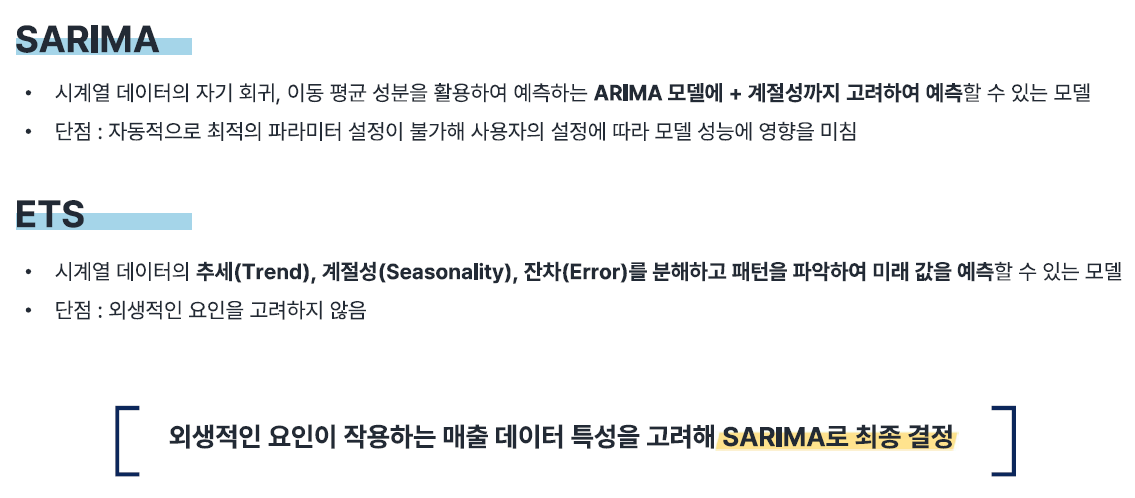

In [108]:
from IPython.display import Image, display
display(Image(filename="SARIMA_ETS.png", width=800, height=350))

Text(0.5, 1.0, '신촌동 한식음식점 2023년 매출 예측 (SARIMA)')

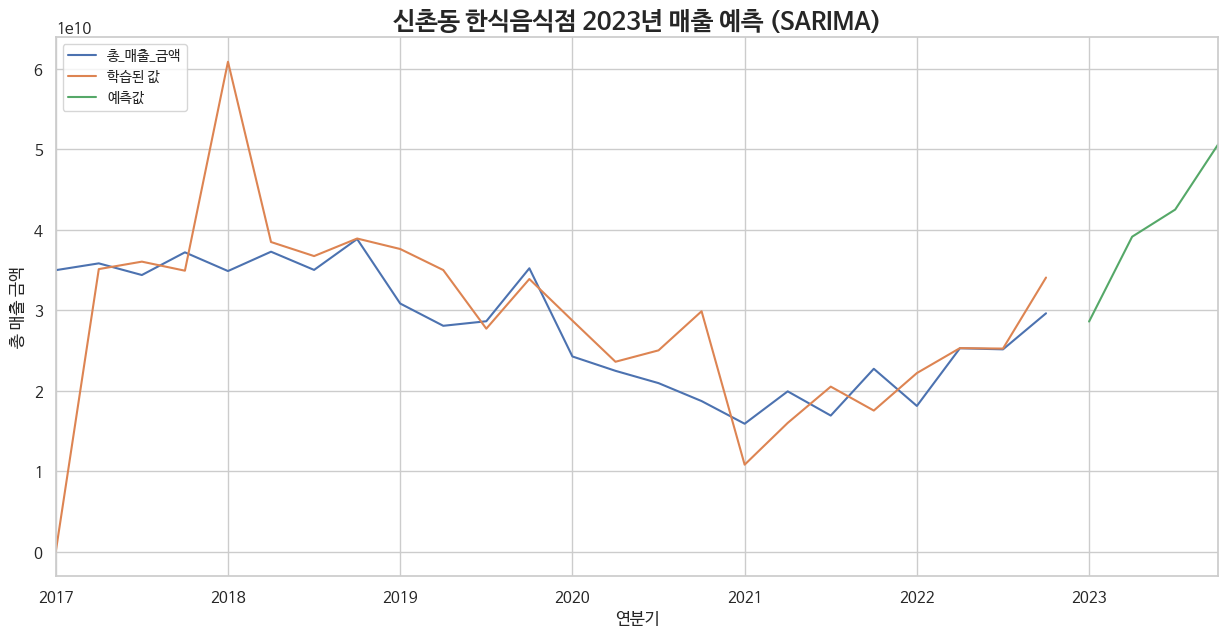

In [109]:
# 미래예측 시각화
df_data.plot(figsize=(15,7))
sarima_fitted.fittedvalues.plot(label = '학습된 값')
forecast_results.예측값.plot()

plt.legend(loc = 'upper left', fontsize =10)
plt.xlabel('연분기')
plt.ylabel('총 매출 금액')
plt.title('신촌동 한식음식점 2023년 매출 예측 (SARIMA)', fontsize = 18, fontweight='bold')

# Auto_arima로 p,q,d 차수 구하기

In [110]:
#모델 확인 (정적)
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [111]:
df = pd.read_csv('/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/데이터/0802_신촌_한식음식점.csv', encoding='cp949', index_col='date', parse_dates=True)

In [112]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq :
        try :
            model = SARIMAX(df['총_매출_금액'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i},{j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))

        except Exception as e:
            print(e)
            continue

SARIMA : (0, 1, 0),(0, 1, 0, 4) >> AIC : 2.1378244436933296e+25
SARIMA : (0, 1, 0),(0, 1, 1, 4) >> AIC : 902.29
SARIMA : (0, 1, 0),(0, 1, 2, 4) >> AIC : 903.08
SARIMA : (0, 1, 0),(1, 1, 0, 4) >> AIC : 901.03
SARIMA : (0, 1, 0),(1, 1, 1, 4) >> AIC : 906.37
SARIMA : (0, 1, 0),(1, 1, 2, 4) >> AIC : 902.74
SARIMA : (0, 1, 0),(2, 1, 0, 4) >> AIC : 904.56
SARIMA : (0, 1, 0),(2, 1, 1, 4) >> AIC : 903.25
SARIMA : (0, 1, 0),(2, 1, 2, 4) >> AIC : 902.57
SARIMA : (0, 1, 1),(0, 1, 0, 4) >> AIC : 901.19
SARIMA : (0, 1, 1),(0, 1, 1, 4) >> AIC : 902.86
SARIMA : (0, 1, 1),(0, 1, 2, 4) >> AIC : 904.83
SARIMA : (0, 1, 1),(1, 1, 0, 4) >> AIC : 902.88
SARIMA : (0, 1, 1),(1, 1, 1, 4) >> AIC : 904.86
SARIMA : (0, 1, 1),(1, 1, 2, 4) >> AIC : 905.03
SARIMA : (0, 1, 1),(2, 1, 0, 4) >> AIC : 904.7
SARIMA : (0, 1, 1),(2, 1, 1, 4) >> AIC : 904.55
SARIMA : (0, 1, 1),(2, 1, 2, 4) >> AIC : 905.41
SARIMA : (0, 1, 2),(0, 1, 0, 4) >> AIC : 903.67
SARIMA : (0, 1, 2),(0, 1, 1, 4) >> AIC : 905.39
SARIMA : (0, 1, 2),(0, 1,

In [113]:
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[(((2, 1, 2), (0, 1, 1, 4)), 899.89)]


In [118]:
# train, test 데이터셋 분할
df_train = df.iloc[:20, :]
df_test = df.iloc[20:, :]

# 인덱스, freq 재설정
df_train.index = pd.date_range(start = df_train.index[0], periods=len(df_train), freq='QS')
df_test.index = pd.date_range(start=df_test.index[0], periods=len(df_test), freq='QS')

# 훈련, 테스트셋 모양 확인
df_train.shape, df_test.shape

((20, 13), (4, 13))

In [121]:
df_train = pd.Series(df_train['총_매출_금액']).astype('float64')

In [122]:
# 모델 생성
model_sarima = sm.tsa.statespace.SARIMAX(endog = df_train,
                                         order=(2, 1, 2), seasonal_order=(0,1,1,4),
                                         trend = 't', freq = 'QS',
                                         seasonal_periods =4,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
# 학습
sarima_fitted = model_sarima.fit(dynamic=False)
print(sarima_fitted.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             총_매출_금액   No. Observations:                   20
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 4)   Log Likelihood                -464.212
Date:                             Wed, 06 Mar 2024   AIC                            942.425
Time:                                     13:36:08   BIC                            942.981
Sample:                                 01-01-2017   HQIC                           938.674
                                      - 10-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       7.944e+08   7.99e-08   9.94e+15      0.000    7.94e+08    7.94e+08
ar.L1         -0.8009   146

## 결과

> auto_arima보다 위에서 직접 구한 차수 값의 AIC 값이 더 낮았기 때문에 차수 p, d, q는 위에서 정한 걸로 한다.